In [1]:
import pandas as pd
## 讀取檔案
df = pd.read_csv('adult.data',sep=", ",header=None,engine='python')
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
## 命名欄位
df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','label']
feature_cols = ['age','workclass','fnlwgt','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country']
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
for column in df.columns:
    print(df[column].value_counts())
    
## education跟education-num數量一樣所以取education-num即可，故刪除education
df = df.drop(columns=['education'])
# df

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
9     10501
10     7291

In [4]:
# label=y，other=X
label = df['label']
for i in range(len(label)):
    if (label[i] == '<=50K'):
        label[i] = 0
    elif (label[i]=='>50K'):
        label[i] = 1
df['label'] = label
df
# convert = {"label" :{"<=50K":0, ">50K":1}, "sex": {"Female":0, "Male":1}}
# df = df.replace(convert)
# df

C:\Users\idsl\AppData\Local\Temp/ipykernel_18764/1424598826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[i] = 0
C:\Users\idsl\AppData\Local\Temp/ipykernel_18764/1424598826.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[i] = 1


,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [5]:
# 缺失值數量
for col,cnt in zip(df.columns,(df=='?').sum(axis = 0)):
    if cnt > 0:
        print(str(col) + ': ' + str(cnt) + ' records has missing value')
        
# print(df['workclass'].unique())
# print(df['occupation'].unique())
# print(df['native-country'].unique())

workclass: 1836 records has missing value
occupation: 1843 records has missing value
native-country: 583 records has missing value


In [6]:
# 缺失值換成np.nan
import numpy as np
df.replace('?', np.nan,inplace=True)

In [7]:
# 確認無缺失值
for col,cnt in zip(df.columns,(df=='?').sum(axis = 0)):
    if cnt == 0:
        print(str(col) + ': ' + str(cnt) + ' records')

age: 0 records
workclass: 0 records
fnlwgt: 0 records
education-num: 0 records
marital-status: 0 records
occupation: 0 records
relationship: 0 records
race: 0 records
sex: 0 records
capital-gain: 0 records
capital-loss: 0 records
hours-per-week: 0 records
native-country: 0 records
label: 0 records


In [8]:
# feature_cols = df.columns.drop(['label','age','education'])
df = pd.get_dummies(df)
# df.columns
feature_cols = df.columns

print(*feature_cols,sep='\n')
print(df.info())

age
fnlwgt
education-num
capital-gain
capital-loss
hours-per-week
label
workclass_Federal-gov
workclass_Local-gov
workclass_Never-worked
workclass_Private
workclass_Self-emp-inc
workclass_Self-emp-not-inc
workclass_State-gov
workclass_Without-pay
marital-status_Divorced
marital-status_Married-AF-spouse
marital-status_Married-civ-spouse
marital-status_Married-spouse-absent
marital-status_Never-married
marital-status_Separated
marital-status_Widowed
occupation_Adm-clerical
occupation_Armed-Forces
occupation_Craft-repair
occupation_Exec-managerial
occupation_Farming-fishing
occupation_Handlers-cleaners
occupation_Machine-op-inspct
occupation_Other-service
occupation_Priv-house-serv
occupation_Prof-specialty
occupation_Protective-serv
occupation_Sales
occupation_Tech-support
occupation_Transport-moving
relationship_Husband
relationship_Not-in-family
relationship_Other-relative
relationship_Own-child
relationship_Unmarried
relationship_Wife
race_Amer-Indian-Eskimo
race_Asian-Pac-Islander
ra

In [9]:
# X = df[feature_cols]
# y = df['label']
X = df.drop('label',axis=1)
y = df['label']                    
print(X)
print(y)

       age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0       39   77516             13          2174             0              40   
1       50   83311             13             0             0              13   
2       38  215646              9             0             0              40   
3       53  234721              7             0             0              40   
4       28  338409             13             0             0              40   
...    ...     ...            ...           ...           ...             ...   
32556   27  257302             12             0             0              38   
32557   40  154374              9             0             0              40   
32558   58  151910              9             0             0              40   
32559   22  201490              9             0             0              20   
32560   52  287927              9         15024             0              40   

       workclass_Federal-go

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [11]:
X_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
28710,22,141028,9,0,0,30,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
25410,45,53123,7,0,0,25,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15662,84,132806,9,0,0,13,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5299,53,34973,10,0,0,45,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26936,46,201865,15,0,0,60,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19835,53,96827,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20112,20,110597,10,0,0,30,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5890,26,267431,13,0,0,20,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
15505,39,225605,9,0,0,24,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [12]:
X_test

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
2611,25,60726,9,0,0,30,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16181,60,93272,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5865,24,190293,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
534,67,231559,15,20051,0,48,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
25176,33,175509,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24289,43,164790,10,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23740,62,114045,9,0,0,35,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15572,34,181388,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
11449,31,164309,10,0,0,38,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [13]:
y_train

28710    0
25410    0
15662    0
5299     0
26936    1
        ..
19835    0
20112    0
5890     0
15505    0
12376    1
Name: label, Length: 26048, dtype: int64

In [14]:
y_test

2611     0
16181    0
5865     0
534      1
25176    0
        ..
24289    1
23740    0
15572    0
11449    0
7236     0
Name: label, Length: 6513, dtype: int64

In [15]:
from sklearn.tree import DecisionTreeClassifier
# dt = DecisionTreeClassifier()
dt = DecisionTreeClassifier(criterion='entropy',max_depth=19, max_leaf_nodes = 92)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.8628896054045755

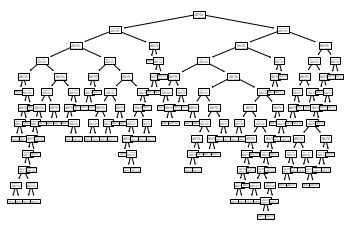

In [16]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(dt)
plt.show()

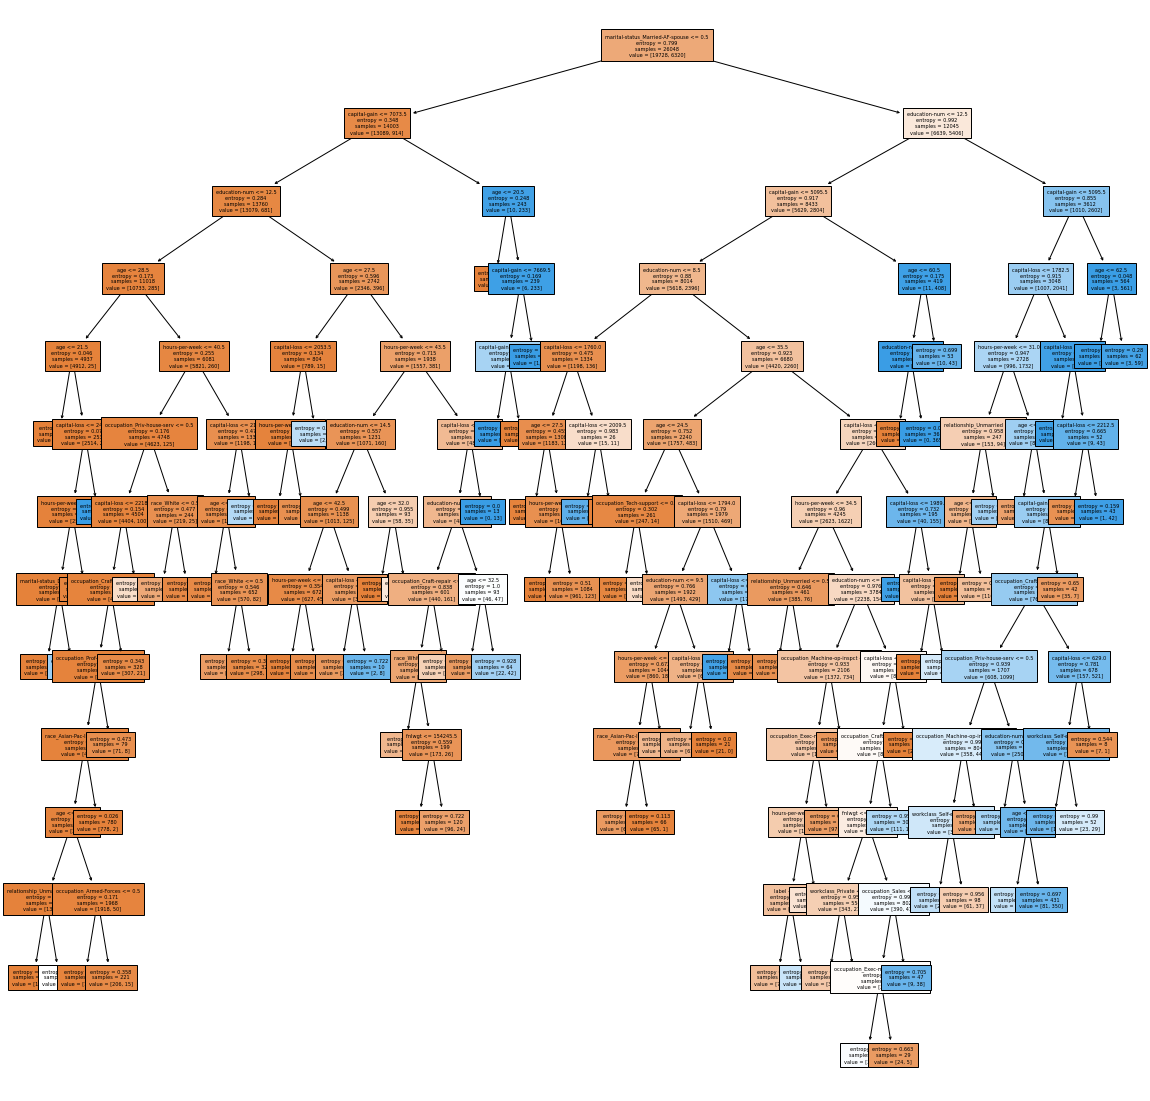

In [17]:
fig = plt.figure(figsize=(20,20))
# _ = tree.plot_tree(dt,filled=True)
_ = tree.plot_tree(dt, feature_names = feature_cols, fontsize = 5, filled = True)